# Some Recommended Practice Environmental conditions
## 2.3 Wind modelling
### 2.3.1 Mean wind speed

#### 2.3.1.1
Weibull distribution 
See 2.3.3.1

#### 2.3.1.2 

Weibull distribution can be assumed for arbitrary 10-minute mean wind speed U<sub>10</sub>

\begin{equation}
F_{U_{10}}(u)=1-\exp \left(-\left(\frac{u}{A}\right)^{k}\right)
\end{equation}

A: scale parameter
k: shape parameter

Both are site- and height-dependent

Three parameter Weibull distribution may provded more felxibility and a better fit to data.

\begin{equation}
F_{U_{10}}(u)=1-\exp \left(-\left(\frac{u-\gamma}{A}\right)^{k}\right)
\end{equation}

$\gamma$ is the location parameter.



#### 2.3.1.3 
Hurricane data

#### 2.3.1.4 
sampling schemes

#### 2.3.1.5 
U<sub>10</sub> is the basis of F<sub>U10</sub>(u) for U<sub>10</sub>

#### 2.3.1.6 
The distribution of the annual maximum 10-minute mean wind speed U<sub>10,max</sub> can be approximated by

\begin{equation}
F_{U_{10, \text { max }^{\prime}} \text { 1year }}(u)=\left(F_{U_{10}}(u)\right)^{N}
\end{equation}

N = 52 560 and N = 52595 in leap years

#### 2.3.1.7 
N is independent of the sampling frequency

#### 2.3.1.8 
If hurricanes occur, the Annual maximum 10-minute mean wind speed U<sub>10,max</sub> shall be based on available hurricane data.

#### 2.3.1.9 
The power-law approximation is a good one to the upper tail of this distribution.  Gumbel distribution may be more practical to use.

#### 2.3.1.10 
The annual maxiumu of the 10-minute mean wind speed U<sub>10,max</sub> can be assumed to follow a Gumbel distribution
<div class="math">
\begin{equation}
F_{U_{10, \max ^{\prime}} 1 y e a r}(u)=\exp \{-\exp [-a(u-b)]\}
\end{equation}
</div>

a and b are site- and height-dependent distribution parameters.

#### 2.3.1.11

Since wind loads are formed by wind pressures, which are proportional to the square of the wind speed,for estimation of characteristic loads defined as the 98% or 99% quantile, use square of the annual maximum of the 10-min mean wind speed and extrapolate to 50- or 100 year return value.

#### 2.3.1.12

Return period _T_<sub>R</sub> in units of years is (1-1/_T_<sub>R</sub>) _U_<sub>10,TR</sub>

\begin{equation}
U_{10, T_{R}}=F_{U_{10, \max ^{\prime}} 1 \text { 1year }}^{-1}\left(1-\frac{1}{{ }_{R}}\right) ; T_{R}>1 \text { year }
\end{equation}


#### 2.3.1.13

50-year 10-minute mean wind speed:

\begin{equation}
U_{10,50}=F_{U_{10, \text { max }^{\prime}} \text { 1year }}^{-1}(0.98)
\end{equation}

100-year 10-minute mean wind speed:

\begin{equation}
U_{10,100}=F_{U_{10, \text { max }^{\prime}} \text { 1year }}^{-1}(0.99)
\end{equation}

When the annual maximum 10-minute mean wind speed is Gumbel-distributed, the 1-year 10-minute mean wind speed becomes,

\begin{equation}
U_{10,1}=F_{U_{10, \text { max }^{\prime}} \text { 1year }}^{-1}(0.368)
\end{equation}


### 2.3.2 Wind speed profiles
#### 2.3.2.1
Idealised model profiles
* the Logarithmic profiles
* the Power law model 
* the Frøya model

#### 2.3.2.2
Application limited to NOT complex wind profiles

#### 2.3.2.3

Friction velocity _u_<sup>*</sup> 

\begin{equation}
u^{*}=\sqrt{\tau / \rho_{a}}
\end{equation}

$\tau$ is the surface shear streas and $\rho_{a}$ is air density

\begin{equation}
u^{*}=\sqrt{\kappa} * U_{10}
\end{equation}

$\kappa$ is a surface drag coefficient



2.3.2.4 

The logarithmic wind speed profile

\begin{equation}
U(z)=\frac{u^{*}}{k_{a}} \ln \frac{z}{z_{0}} \\
\end{equation}

where $\kappa_{a}=0.4$, von Karman’s constant,$z$ is the height and $z_0$ is a terrain roughness parameter

Open sea without waves $z_0$ = 0.0001

Open sea without waves $z_0$ = 0.0001 to 0.01

Coastal Areas with on shore wind $z_0$ = 0.001 to 0.01




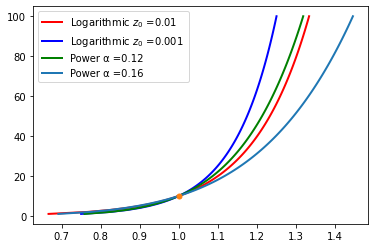

In [56]:
import numpy as np
import matplotlib.pyplot as plt

Z_0 = 0.01
Z_1 = 0.001
K_a = 0.4

Height = np.linspace(1,100, 100)

H = 10
alpha1 = 0.12
alpha2 = 0.16
Kappa = K_a**2 /((np.log(H/Z_0)))**2

Uz1 = (1+1/K_a*np.sqrt(Kappa)*np.log(Height / H))
Uz2 = (1+np.log(Height/H)/np.log(H/Z_1))
UzPower1 = (Height/H)**alpha1
UzPower2 = (Height/H)**alpha2
plt.plot(Uz1, Height, "r-", lw=2,label = f'Logarithmic $z_{0}$ ={Z_0} ')
plt.plot(Uz2, Height, "b-", lw=2,label = f'Logarithmic $z_{0}$ ={Z_1} ')
plt.plot(UzPower1, Height, "g-", lw=2,label = f'Power \u03B1 ={alpha1} ')
plt.plot(UzPower2, Height, "-", lw=2,label = f'Power \u03B1 ={alpha2} ')
plt.plot(1, 10,'.',markersize=10)

plt.legend()



Following script is from  [Risk Engineering: Analyzing weather data¶](https://risk-engineering.org/notebook/data-analysis-weather.html)

In [1]:
import numpy
import scipy.stats
import pandas
import matplotlib.pyplot as plt
plt.style.use("bmh")

In [2]:
data = pandas.read_csv("https://risk-engineering.org/static/data/TLS-weather-data-2013.csv")
data.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2013-1-1,12,9,6,8,7,5,93,86,76,...,31,10,5,26,14,NaN,5.08,7.0,Rain,234
1,2013-1-2,9,7,4,6,4,2,93,86,71,...,31,11,10,23,16,NaN,0.00,5.0,NaN,298
2,2013-1-3,8,4,0,4,2,-1,100,87,69,...,19,10,10,13,5,NaN,0.00,5.0,NaN,118
3,2013-1-4,7,6,5,7,6,4,100,94,83,...,10,6,1,10,5,NaN,0.00,8.0,Fog,292
4,2013-1-5,7,6,5,6,6,4,100,94,90,...,11,9,2,16,8,NaN,0.00,8.0,NaN,306


Text(0.5, 0, 'Mean wind speed (km/h)')

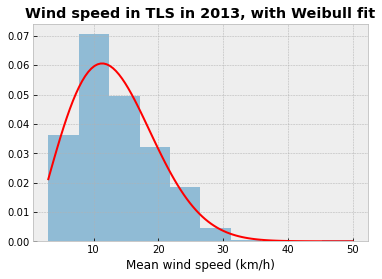

In [3]:
wind = data["Mean Wind SpeedKm/h"]
p0, p1, p2 = scipy.stats.weibull_min.fit(wind, floc=0)
plt.hist(wind, density=True, alpha=0.5)
support = numpy.linspace(wind.min(), wind.max(), 100)
plt.plot(support, scipy.stats.weibull_min.pdf(support, p0, p1, p2), "r-", lw=2)
plt.title("Wind speed in TLS in 2013, with Weibull fit", weight="bold")
plt.xlabel("Mean wind speed (km/h)")

KstestResult(statistic=0.10271843796037439, pvalue=0.0008323398083244365)

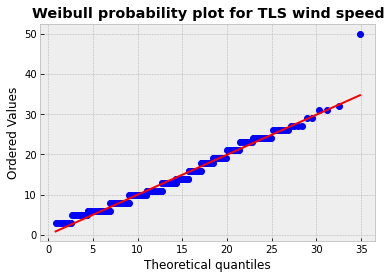

In [4]:
scipy.stats.probplot(wind, dist=scipy.stats.weibull_min(p0, p1, p2), 
                     plot=plt.figure().add_subplot(111))
plt.title("Weibull probability plot for TLS wind speed", weight="bold")
scipy.stats.kstest(wind, "weibull_min", args=(p0, p1, p2))